In [1]:
import pandas as pd
path_dataframe = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/entropy_mindboggle_dataset008/df_results.csv"

df = pd.read_csv(path_dataframe)

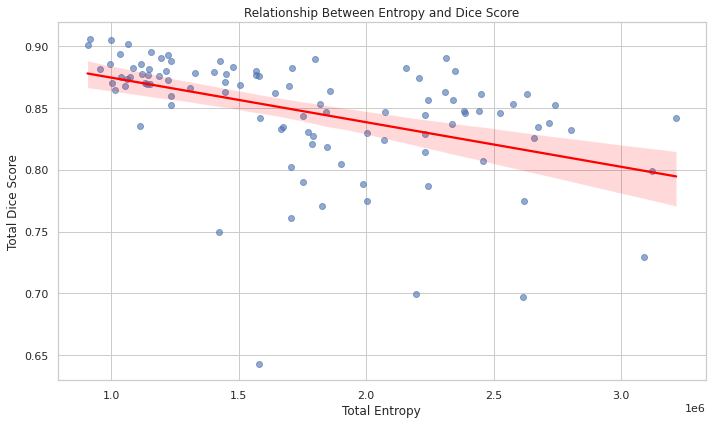

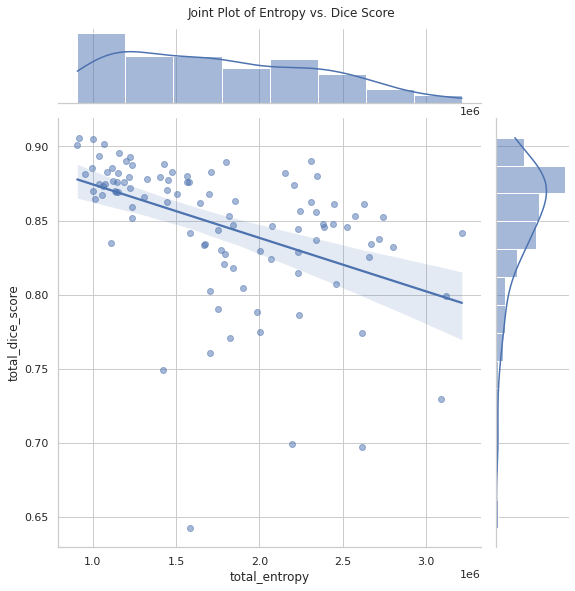

Correlation Analysis between Entropy and Dice Score:
Pearson Correlation: -0.4579 (p-value: 1.4785e-06)
Spearman Correlation: -0.6121 (p-value: 1.0357e-11)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

def analyze_entropy_dice_relationship(df_results, plot=True):
    """
    Analyze the relationship between entropy and Dice scores.

    Parameters:
    - df_results (pd.DataFrame): DataFrame containing 'total_dice_score' and 'total_entropy' for each sample.
    - plot (bool): Whether to generate and display plots.

    Returns:
    - analysis_results (dict): Dictionary containing correlation coefficients and p-values.
    """
    # Ensure required columns are present
    required_columns = ['total_dice_score', 'total_entropy']
    for col in required_columns:
        if col not in df_results.columns:
            raise ValueError(f"Column '{col}' is missing from the DataFrame.")

    # Drop rows with missing values in required columns
    df_clean = df_results.dropna(subset=required_columns)
    
    if df_clean.empty:
        raise ValueError("No data available after removing samples with missing values.")

    # Extract variables
    dice_scores = df_clean['total_dice_score']
    entropies = df_clean['total_entropy']

    # Compute Pearson correlation
    pearson_corr, pearson_p = pearsonr(entropies, dice_scores)

    # Compute Spearman correlation
    spearman_corr, spearman_p = spearmanr(entropies, dice_scores)

    analysis_results = {
        'pearson_correlation': pearson_corr,
        'pearson_p_value': pearson_p,
        'spearman_correlation': spearman_corr,
        'spearman_p_value': spearman_p
    }

    if plot:
        # Set the aesthetic style of the plots
        sns.set(style="whitegrid")

        # Create a scatter plot with regression line using Seaborn
        plt.figure(figsize=(10, 6))
        sns.regplot(x='total_entropy', y='total_dice_score', data=df_clean, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
        plt.title('Relationship Between Entropy and Dice Score')
        plt.xlabel('Total Entropy')
        plt.ylabel('Total Dice Score')
        plt.tight_layout()
        plt.show()

        # Optionally, create a joint plot
        sns.jointplot(x='total_entropy', y='total_dice_score', data=df_clean, kind='reg', height=8, scatter_kws={'alpha':0.5})
        plt.suptitle('Joint Plot of Entropy vs. Dice Score', y=1.02)
        plt.show()

    return analysis_results

# Assuming you have already computed df_results
# per_class_dice_scores, total_dice_scores, df_results = compute_dice_scores(dataset, class_names)

# Analyze the relationship between entropy and Dice scores
analysis_results = analyze_entropy_dice_relationship(df)

# Display the results
print("Correlation Analysis between Entropy and Dice Score:")
print(f"Pearson Correlation: {analysis_results['pearson_correlation']:.4f} (p-value: {analysis_results['pearson_p_value']:.4e})")
print(f"Spearman Correlation: {analysis_results['spearman_correlation']:.4f} (p-value: {analysis_results['spearman_p_value']:.4e})")

